### Geração de Patches em Zig - Zag


In [1]:
from PIL import Image
import numpy as np
import random
random.seed(10)
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
path_image = "../../data/base_recortada/ASC-H/10.png"
im = Image.open(path_image)
im.format, im.size, im.mode

('PNG', (90, 90), 'RGB')

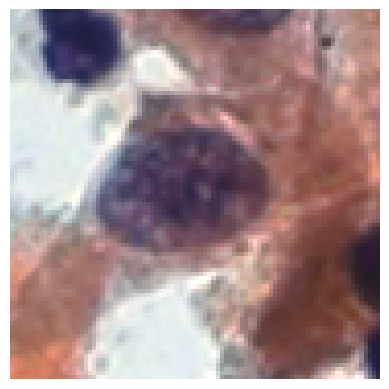

In [3]:
plt.imshow(im)
plt.axis('off')
plt.show()

In [4]:
# VISUALIZACAO
def visualize_patch_centers(image, centers, patch_size):
    fig, ax = plt.subplots(1)
    
    image_np = np.array(image)
    
    if image_np.max() > 1:
        image_np = image_np / 255.0
    
    ax.imshow(image_np)
    
    patch_height, patch_width = patch_size
    
    for (w, h) in centers:
        rect = patches.Rectangle(
            (w - patch_width // 2, h - patch_height // 2), 
            patch_width, patch_height,
            linewidth=1, edgecolor='red', facecolor='none'
        )
        ax.add_patch(rect)
        plt.plot(w, h, marker='v', color='r')
    
    ax.set_xlim([0, image_np.shape[1]])
    ax.set_ylim([image_np.shape[0], 0])
    plt.axis('off')
    plt.show()

In [53]:
# Gerando diagonal
def generete_diagonal_element(ponto_atual, distance, angle_deg, img_size=224, direction="cima_baixo"):
  angle_rad = np.radians(angle_deg)
  delta_x = int(distance * np.cos(angle_rad)) 
  delta_y = int(distance * np.sin(angle_rad)) 

  if direction == "cima_baixo":
    new_x = ponto_atual[0] - delta_x
    new_y = ponto_atual[1] + delta_y
  elif direction == "baixo_cima":
    new_x = ponto_atual[0] + delta_x
    new_y = ponto_atual[1] - delta_y
    
  
  new_x = max(8, min(new_x, img_size -8))
  new_y = max(8, min(new_y, img_size -8))
  
  return (new_x, new_y)


# def generete_diagonal(ponto_atual, distance, angle_deg, img_size, direction):
#   centers = []
  
#   while centers[-1][0] != 8:
#     centers.append(generete_diagonal(ponto_atual=ponto_atual, distance=distance, angle_deg=angle_deg, img_size=img_size, direction=direction))
    
#   return centers

In [9]:
# Andar para esquerda
def move_left(position_actual, move=16, qtd_move=1):

  centers = []
  centers.append((position_actual[0] + move, position_actual[1]))
  
  for i in range(0, qtd_move-1):
    centers.append((centers[-1][0] + move, centers[-1][1]))
    
  
  return centers

In [48]:
def move_down(position_actual, move=16, qtd_move=1):
  centers = []
  centers.append((position_actual[0] , position_actual[1] + move))
  
  for i in range(0, qtd_move-1):
    centers.append((centers[-1][0], centers[-1][1] + move))
    
  
  return centers

Zig Zag Stride 16

[(8, 8), (24, 8), (13, 19), (8, 30), (8, 46), (19, 35), (30, 24), (41, 13), (52, 8), (68, 8), (57, 19), (46, 30), (35, 41), (24, 52), (13, 63), (8, 74), (8, 90), (19, 79), (30, 68), (41, 57), (52, 46), (63, 35), (74, 24), (85, 13), (96, 8), (112, 8), (101, 19), (90, 30), (79, 41), (68, 52), (57, 63), (46, 74), (35, 85), (24, 96), (13, 107), (8, 118), (8, 134), (19, 123), (30, 112), (41, 101), (52, 90), (63, 79), (74, 68), (85, 57), (96, 46), (107, 35), (118, 24), (129, 13), (140, 8), (156, 8), (145, 19), (134, 30), (123, 41), (112, 52), (101, 63), (90, 74), (79, 85), (68, 96), (57, 107), (46, 118), (35, 129), (24, 140), (13, 151), (8, 162), (8, 178), (19, 167), (30, 156), (41, 145), (52, 134), (63, 123), (74, 112), (85, 101), (96, 90), (107, 79), (118, 68), (129, 57), (140, 46), (151, 35), (162, 24), (173, 13), (184, 8), (200, 8), (189, 19), (178, 30), (167, 41), (156, 52), (145, 63), (134, 74), (123, 85), (112, 96), (101, 107), (90, 118), (79, 129), (68, 140), (57, 151), (46, 162), (3

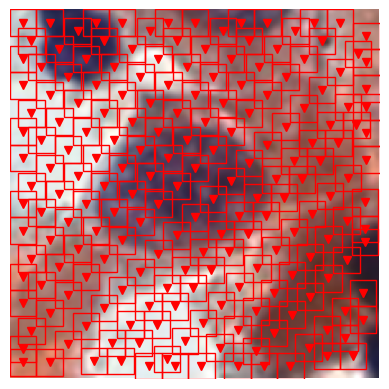

196


In [475]:
def generete_diagonal(ponto_atual, distance, angle_deg, img_size=224, direction="cima_baixo", metade="first"):
  centers = []
  centers.append(ponto_atual)
  
  
  if metade == 'first':
    if direction == "cima_baixo":
      while centers[-1][0] != 8:
        centers.append(generete_diagonal_element(ponto_atual=centers[-1], distance=distance, angle_deg=angle_deg, img_size=img_size, direction=direction))
    elif direction == "baixo_cima":
      while centers[-1][1] != 8:
        centers.append(generete_diagonal_element(ponto_atual=centers[-1], distance=distance, angle_deg=angle_deg, img_size=img_size, direction=direction))
  elif(metade == "last"):
    if direction == "cima_baixo":
      while not (214 <= centers[-1][1] <= 216) :
        centers.append(generete_diagonal_element(ponto_atual=centers[-1], distance=distance, angle_deg=angle_deg, img_size=img_size, direction=direction))
    elif direction == "baixo_cima":
      while not (214 <= centers[-1][0] <= 216):
        centers.append(generete_diagonal_element(ponto_atual=centers[-1], distance=distance, angle_deg=angle_deg, img_size=img_size, direction=direction))
  
  centers.pop(0)
  
  return centers




def generate_zig_zag_centers(): 
  center = []
  angle = 45
  distance = 16
  qtd_move_down_left = 1
    
    
    
  center.append((8, 8))
  for i in range(0, 4):  
    center.extend(move_left(center[-1], qtd_move=qtd_move_down_left))
    center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="cima_baixo", metade="first"))
    center.extend(move_down(center[-1], qtd_move=qtd_move_down_left))
    center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="baixo_cima", metade="first"))

  center.extend(move_left(center[-1], qtd_move=qtd_move_down_left))
  center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="cima_baixo", metade="first"))
  center.extend(move_down(center[-1], qtd_move=qtd_move_down_left, move=8))
  center.extend(move_left(center[-1], qtd_move=qtd_move_down_left))
  
  
  
  center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="baixo_cima", metade="last"))
  center.extend(move_down(center[-1], qtd_move=qtd_move_down_left+1))
  center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="cima_baixo", metade="last"))
  center.pop(-1)
  center.extend(move_left(center[-1], qtd_move=qtd_move_down_left))
  center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="baixo_cima", metade="last"))
  center.extend(move_down(center[-1], qtd_move=qtd_move_down_left+1))
  center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="cima_baixo", metade="last"))
  center.extend(move_left(center[-1], qtd_move=qtd_move_down_left+1))
  center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="baixo_cima", metade="last"))
  center.extend(move_down(center[-1], qtd_move=qtd_move_down_left))
  center.extend(move_down(center[-1], qtd_move=1, move=8))
  center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="cima_baixo", metade="last"))
  center.extend(move_left(center[-1], qtd_move=qtd_move_down_left+1))
  center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="baixo_cima", metade="last"))
  center.extend(move_down(center[-1], qtd_move=qtd_move_down_left))
  center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="cima_baixo", metade="last"))
  center.pop(-1)
  center.extend(move_left(center[-1], qtd_move=1))
  
  for _ in range(len(center)-196):
    center.pop()  
  
  
  
  return center
  
      
    
  
  
  
img_zig_zag = generate_zig_zag_centers()
print(img_zig_zag)
print(len(img_zig_zag))
resized_image = im.resize((224,224))
visualize_patch_centers(resized_image, img_zig_zag, (16,16))


cont = 0

for each in img_zig_zag:
  if (each[0] <= 224 and each[1] <= 224) and (each[0] >= 0 and each[1] >= 0):
    cont += 1

print(cont)

Zig-Zag Stride 10

[(8, 8), (24, 8), (40, 8), (33, 15), (26, 22), (19, 29), (12, 36), (8, 43), (8, 59), (8, 75), (15, 68), (22, 61), (29, 54), (36, 47), (43, 40), (50, 33), (57, 26), (64, 19), (71, 12), (78, 8), (94, 8), (110, 8), (103, 15), (96, 22), (89, 29), (82, 36), (75, 43), (68, 50), (61, 57), (54, 64), (47, 71), (40, 78), (33, 85), (26, 92), (19, 99), (12, 106), (8, 113), (8, 129), (8, 145), (15, 138), (22, 131), (29, 124), (36, 117), (43, 110), (50, 103), (57, 96), (64, 89), (71, 82), (78, 75), (85, 68), (92, 61), (99, 54), (106, 47), (113, 40), (120, 33), (127, 26), (134, 19), (141, 12), (148, 8), (164, 8), (180, 8), (173, 15), (166, 22), (159, 29), (152, 36), (145, 43), (138, 50), (131, 57), (124, 64), (117, 71), (110, 78), (103, 85), (96, 92), (89, 99), (82, 106), (75, 113), (68, 120), (61, 127), (54, 134), (47, 141), (40, 148), (33, 155), (26, 162), (19, 169), (12, 176), (8, 183), (8, 199), (8, 215), (15, 208), (22, 201), (29, 194), (36, 187), (43, 180), (50, 173), (57, 166), (64, 159), (71,

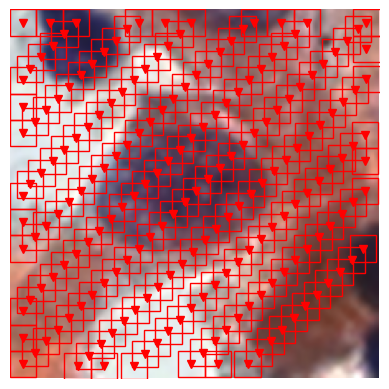

196


In [474]:
def generete_diagonal(ponto_atual, distance, angle_deg, img_size=224, direction="cima_baixo", metade="first"):
  centers = []
  centers.append(ponto_atual)
  
  
  if metade == 'first':
    if direction == "cima_baixo":
      while centers[-1][0] != 8:
        centers.append(generete_diagonal_element(ponto_atual=centers[-1], distance=distance, angle_deg=angle_deg, img_size=img_size, direction=direction))
    elif direction == "baixo_cima":
      while centers[-1][1] != 8:
        centers.append(generete_diagonal_element(ponto_atual=centers[-1], distance=distance, angle_deg=angle_deg, img_size=img_size, direction=direction))
  elif(metade == "last"):
    if direction == "cima_baixo":
      while not (214 <= centers[-1][1] <= 216) :
        centers.append(generete_diagonal_element(ponto_atual=centers[-1], distance=distance, angle_deg=angle_deg, img_size=img_size, direction=direction))
    elif direction == "baixo_cima":
      while not (214 <= centers[-1][0] <= 216):
        centers.append(generete_diagonal_element(ponto_atual=centers[-1], distance=distance, angle_deg=angle_deg, img_size=img_size, direction=direction))
  
  centers.pop(0)
  
  return centers




def generate_zig_zag_centers(): 
  center = []
  angle = 45
  distance = 10
  qtd_move_down_left = 2
    
    
    
  center.append((8, 8))
  for i in range(0, 3):  
    center.extend(move_left(center[-1], qtd_move=qtd_move_down_left))
    center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="cima_baixo", metade="first"))
    center.extend(move_down(center[-1], qtd_move=qtd_move_down_left))
    center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="baixo_cima", metade="first"))


  center.extend(move_down(center[-1], qtd_move=qtd_move_down_left-1))
  center.extend(move_down(center[-1], qtd_move=1, move=18))
  center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="cima_baixo", metade="last"))
  center.extend(move_left(center[-1], qtd_move=qtd_move_down_left-1))
  center.extend(move_left(center[-1], qtd_move=1, move=18))
  center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="baixo_cima", metade="last"))
  center.extend(move_down(center[-1], qtd_move=qtd_move_down_left-1))
  center.extend(move_down(center[-1], qtd_move=1, move=18))
  center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="cima_baixo", metade="last"))
  center.extend(move_left(center[-1], qtd_move=qtd_move_down_left-1))
  center.extend(move_left(center[-1], qtd_move=1, move=18))
  center.extend(generete_diagonal(ponto_atual=center[-1], distance=distance, angle_deg=angle, direction="baixo_cima", metade="last"))
  center.extend(move_down(center[-1], qtd_move=qtd_move_down_left-1))
  center.extend(move_down(center[-1], qtd_move=1, move=18))
  
  for _ in range(len(center)-196):
    center.pop()  
  
  
  
  return center
  
      
    
  
  
  
img_zig_zag = generate_zig_zag_centers()
print(img_zig_zag)
print(len(img_zig_zag))
resized_image = im.resize((224,224))
visualize_patch_centers(resized_image, img_zig_zag, (16,16))


cont = 0

for each in img_zig_zag:
  if (each[0] <= 224 and each[1] <= 224) and (each[0] >= 0 and each[1] >= 0):
    cont += 1

print(cont)